# Analysis of Airbnb Marketplace in Vancouver

## Objective

Vancouver is an expensive place to live. Housing costs vary a lot from one area to the next, so it takes time to learn about the different neighbourhoods before you settle in.

Airbnb is a desirable option for newcomers for the following reasons: 

Preferably before landing, newcomers may want to set up temporary accommodation for when they immediately arrive in the city. The online marketplace is accessible worldwide. 

Moreover, the prices of the listing on Airbnb are generally more economical than hotels for the short-term renting. 

In addition, the temporary accommodations offer newcomers more flexibility compared with fixed term tenancies.

Currently there are a few analyses which provide a reference and insights into the market. But they focus solely on the data itself. The analysis here is part of the **"Know Before You Go"** project and will be fed to another Machine Learning system, along with many other attributes in other datasets. The downstream system will determine the correlation among the data and offer target audience reference solutions.

## Questions

The quetions are categozied into three major features in terms of the assumptions for newcomers who care about **locations** and **prices**.

**Locations**:
1. How listings are distributed in Vancouver and in which areas listings are distributed densely?
2. How are property types dispersed throughout the city?

**Prices**:
3. Where are the most expensive/economical neighbourhoods to rent an Airbnb?
4. Which listings are undervalued – more beneficial to necomers?

**Others**:
5. How many houses/apartments are being rented out more frequently for the short-term purpose? 
6. Any impact from cancellation policies?


## Exploratory Data Analysis (EDA)

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

airbnb = pd.read_csv("listings_09Nov2019.csv")
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,https://www.airbnb.com/rooms/10080,20191109094845,2019-11-09,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, option to add up to 2 tw...","Stunning two bedroom, two bathroom apartment. ...",none,NaN,1. CHECK-IN TIME IS AFTER 3PM PST AND CHECK-OU...,NaN,"Enjoy our amenities which include gym, pool, h...",NaN,1. CHECK-IN TIME IS AFTER 3 PM PST AND CHECK-O...,NaN,NaN,https://a0.muscache.com/im/pictures/55778229/c...,NaN,30899,https://www.airbnb.com/users/show/30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",I will be happy to host you.,within a day,81%,NaN,f,https://a0.muscache.com/im/pictures/user/55302...,https://a0.muscache.com/im/pictures/user/55302...,Coal Harbour,39.0,39.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Vancouver, BC, Canada",Coal Harbour,Downtown,NaN,Vancouver,BC,V6E 2P4,Vancouver,"Vancouver, Canada",CA,Canada,49.28772,-123.12110,t,Condominium,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1200.0,$151.00,NaN,"$4,750.00","$1,500.00",$195.00,1,$0.00,60,1124,60,60,1124,1124,60.0,1124.0,a week ago,t,0,6,36,311,2019-11-09,16,0,2011-11-15,2017-02-26,93.0,9.0,9.0,10.0,9.0,10.0,9.0,t,18-476608,"{""British Columbia"","" Canada"","" Vancouver"","" B...",t,f,strict_14_with_grace_period,f,f,43,43,0,0,0.16
1,13188,https://www.airbnb.com/rooms/13188,20191109094845,2019-11-09,Garden level studio in ideal loc.,Garden level studio suite with garden patio - ...,Very Close (3min walk) to Nat Bailey baseball ...,Garden level studio suite with garden patio - ...,none,The uber hip Main street area is a short walk ...,Parking is free on the streets to the east and...,Check out (Website hidden by Airbnb) To see t...,NaN,We live in the house in which the suite is loc...,Limited noise after 11:00pm. Strictly NO SMOKING,NaN,NaN,https://a0.muscache.com/im/pictures/8408188/e1...,NaN,51466,https://www.airbnb.com/users/show/51466,Family Guns,2009-11-04,"Vancouver, British Columbia, Canada",We are a family of four who love to travel in ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/51466/profile...,https://a0.muscache.com/im/users/51466/profile...,Riley Park,2.0,2.0,"['email', 'phone', 'fa

In [15]:
airbnb.shape
airbnb.info()
airbnb.columns.tolist()

(6181, 106)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6181 entries, 0 to 6180
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 5.0+ MB


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


### 1. Numerical Attributes

There are 106 attributes in the dataset. Before selecting the numerical attributes, I need to remove the unnecessary symbols in the data, to be specific, in the columns of `host_response_rate`, `price`, `weekly_price`,	`monthly_price`, `security_deposit`,	`cleaning_fee`,	`extra_people`.

In [16]:
airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']] =\
    airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']].apply(lambda x: x.str.replace('$', ''))

airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']] =\
    airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']].apply(lambda x: x.str.replace(',', ''))

airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']] =\
    airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']].astype(float)

airbnb['host_response_rate'] = airbnb['host_response_rate'].str.replace('%', '').astype(float)
airbnb['host_response_rate'] = airbnb['host_response_rate']/100

In [17]:
type(airbnb['neighbourhood_group_cleansed'][1])

airbnb['neighbourhood_group_cleansed'] = airbnb['neighbourhood_group_cleansed'].astype(str)

numpy.float64

In [18]:
airbnb_num = airbnb.select_dtypes(include=['float64', 'int64'])

# show all the selected columns
pd.set_option('display.max_columns', None)
airbnb_num.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.181000e+03,6.181000e+03,0.0,0.0,0.0,6.181000e+03,5400.000000,0.0,6175.000000,6175.000000,6181.000000,6181.000000,6181.000000,6179.000000,6179.000000,6177.000000,75.000000,6181.000000,513.000000,553.000000,5298.000000,5735.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,5326.000000,5326.000000,5326.000000,5323.000000,5325.000000,5323.000000,5323.000000,6181.000000,6181.000000,6181.000000,6181.000000,5358.000000
mean,2.539230e+07,2.019111e+13,NaN,NaN,NaN,1.050765e+08,0.969591,NaN,4.147368,4.147368,49.260711,-123.111563,3.533732,1.333954,1.527755,1.874858,941.573333,180.013914,802.783626,2750.443038,414.979237,84.973845,1.972335,16.402200,11.721243,678.577253,11.464326,12.241385,695.863291,696.979130,11.844734,696.535658,12.211454,26.894192,44.517554,137.764601,35.765410,16.129752,94.582801,9.686068,9.524596,9.754274,9.787793,9.728912,9.375728,3.374697,2.226986,1.019738,0.060023,2.430707
std,1.159556e+07,1.918124e+00,NaN,NaN,NaN,9.996218e+07,0.115652,NaN,9.639047,9.639047,0.021476,0.039538,2.162202,0.659939,1.107816,1.264570,2780.241722,306.978613,499.633410,1756.025512,679.964019,65.007628,1.624164,27.879486,29.570367,592.949691,29.547207,30.281286,590.537028,590.440006,29.702665,590.294588,11.281114,21.423306,32.131076,119.621523,55.294712,21.646827,7.270507,0.724242,0.856927,0.638339,0.644022,0.583150,0.820004,6.460788,6.015844,2.456732,0.665460,2.159784
min,1.008000e+04,2.019111e+13,NaN,NaN,NaN,6.033000e+03,0.000000,NaN,0.000000,0.000000,49.202900,-123.218790,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,150.000000,530.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.734767e+07,2.019111e+13,NaN,NaN,NaN,1.553542e+07,1.000000,NaN,1.000000,1.000000,49.246900,-123.130380,2.000000,1.000000,1.000000,1.000000,0.000000,85.000000,459.000000,1650.000000,125.000000,40.000000,1.000000,0.000000,1.000000,60.000000,1.000000,2.000000,60.000000,60.000000,1.100000,60.000000,0.000000,5.000000,10.000000,37.000000,3.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.650000
50%,2.783392e+07,2.019111e+13,NaN,NaN,NaN,6.595935e+07,1.000000,NaN,1.000000,1.000000,49.265960,-123.115100,3.000000,1.000000,1.000000,2.000000,60.000000,129.000000,700.000000,2400.000000,250.000000,75.000000,1.000000,10.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,10.000000,26.000000,48.000000,99.000000,15.000000,6.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,1.850000
75%,3.557718e+07,2.019111e+13,NaN,NaN,NaN,1.937396e+08,1.000000,NaN,3.000000,3.000000,49.278640,-123.087580,4.000000,1.500000,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FA51C94E0>,
      dtype=object)

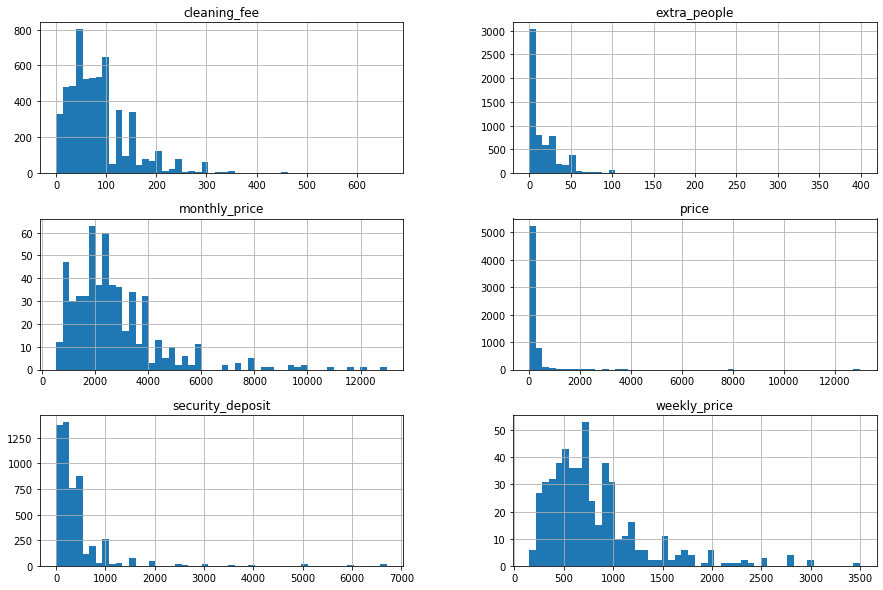

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

price = airbnb[['price', 'weekly_price', 'monthly_price', 
                'security_deposit', 'cleaning_fee', 'extra_people']]

price.hist(bins = 50, figsize = (15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FAE280630>,
      dtype=object)

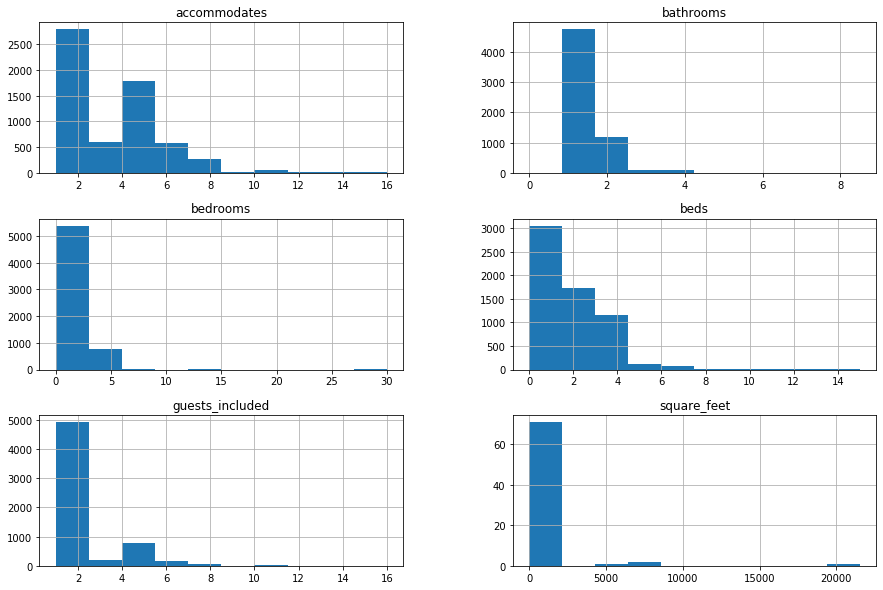

In [20]:
basic = airbnb[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included']]

basic.hist(bins = 10, figsize = (15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FAE699DA0>,
      dtype=object)

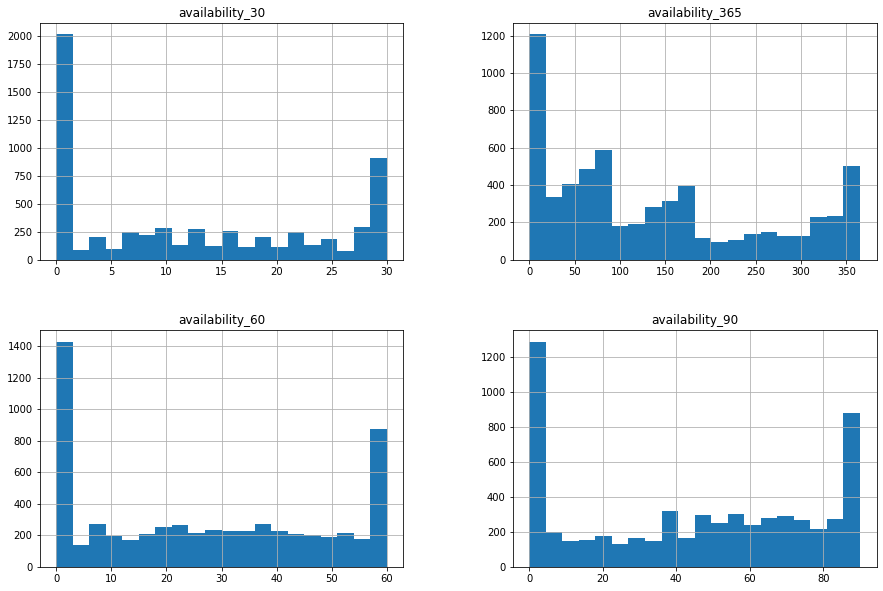

In [21]:
availability = airbnb_num[['availability_30', 'availability_60', 'availability_90', 'availability_365']]

availability.hist(bins = 20, figsize = (15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FAE50DCC0>,
      dtype=object)

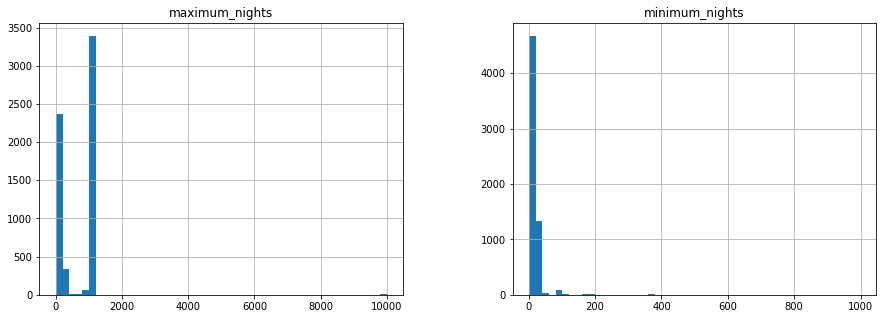

In [22]:
nights = airbnb_num[['minimum_nights', 'maximum_nights']]

nights.hist(bins = 50, figsize = (15, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FAF15A0B8>,
      dtype=object)

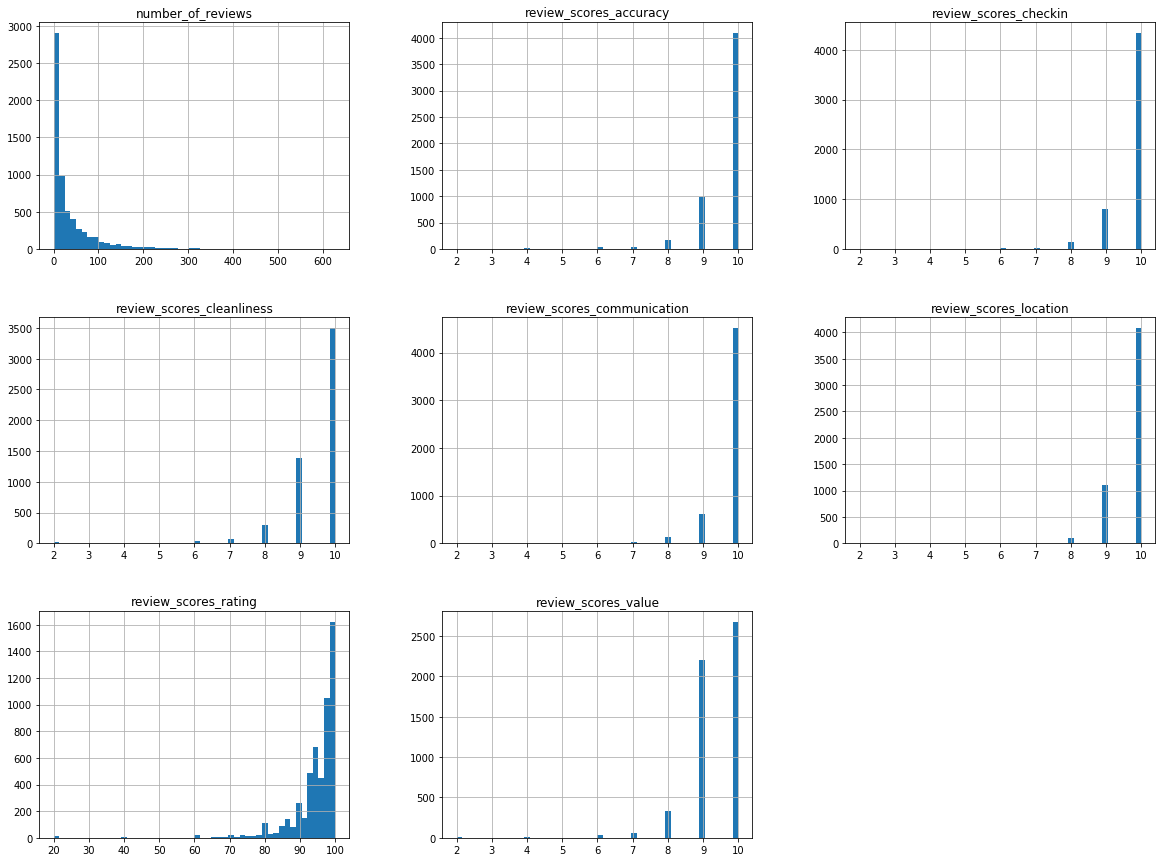

In [23]:
reviews = airbnb_num[['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                      'review_scores_location', 'review_scores_value']]

reviews.hist(bins = 50, figsize = (20, 15))

From the above histograms we find there are some outliers. To be specific, the distributions of the `review score` related attributes are left skewed while the distributions of the `basic` attributes and price-related attributes are right skewed. For example, some value in (daily) `price` is more than $2000. 

As <a href="https://github.com/vcai01/know_before_you_go">the target audience</a> is clarified, it is less likely for newcomers to rent a short-term place accommodating more than the number of their household members. Also, it is unusual for newcomers to spend more than $1000 on short-term accommodation for only one night, so I subset the data and use the `airbnb_newcomers` hereafter.

In [24]:
airbnb_newcomers = airbnb[(airbnb['accommodates'] <= 6) & (airbnb['price'] < 1000)]

len(airbnb_newcomers)

5733

### 2.  Categorical Attributes



In [25]:
from plotnine import *

airbnb_melted = pd.melt(airbnb_newcomers, id_vars = ['host_id'], value_vars = ['host_identity_verified', 'host_is_superhost']) 

airbnb_host_count = airbnb_melted.replace(np.NaN,'NA').groupby(['value', 'variable']).count().reset_index()
airbnb_host_count.rename(columns = {'host_id': 'Count'}, inplace = True)

airbnb_host_count

,value,variable,Count
0,NA,host_identity_verified,4
1,NA,host_is_superhost,4
2,f,host_identity_verified,3600
3,f,host_is_superhost,3642
4,t,host_identity_verified,2129
5,t,host_is_superhost,2087


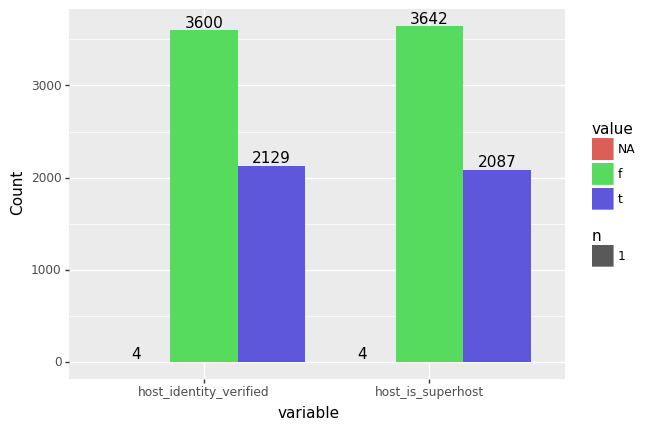

<ggplot: (141652595720)>

In [48]:
ggplot(airbnb_host_count, aes(x='variable', y='Count', fill = 'value')) +\
    geom_bar(stat = 'sum', position = 'dodge') +\
    geom_text(aes(label = 'Count'), position = position_dodge(0.9), vjust = 'bottom')



### 3. Missing Values